# Project 02: Investigate the Brazil No-Show Appointments Dataset

-------------------------

    
|   * * * * * * * * * *   | **Udacity**         | 
| -------------           |:-------------:      |
| **Nanodegree:**         | *Data Analyst*    | 
| **Student:**            | *Theresa Kocher*    |
| **Date:**               | *13th January 2019*  |



## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4. Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

The dataset contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included for each appointment (in each row):

*some personal details about the patient*:
- **PatientId**
- **Age**
- **Gender**
- **Scholarship**: if patient gets subsidies from the Brasilian welfare program.

*some medical relevant informations about the patient*: 
- **Hipertension**
- **Diabetes**
- **Alcoholism**
- **Handcap**

*some details about the appointment itself*:
- **AppointmentID**
- **ScheduledDay**: when they scheduled their appointment
- **AppointmentDay**: the date of the appointment
- **Neighbourhood**: location of the hospital
- **SMS_received**
- **No-show**


### Interesting questions

1. If the patient is part of the scholarship program is it more or less likely that the patient will show up?

2. Have some of the medical informations about the patient (Alcoholism, Handcap, Diabetes, Hipertension) an influence to the patients reliability?

3. Are the reliability in each neighbourhood the same or are their more reliabile neighbourhoods than others?

4. Does it help if the patient receive an SMS before the appointment? Do those patients that receive an SMS appear more often to their appointments?

5. Are there a different behaviour between man and woman?

6. Is age a relevant characteristic to predict if a patient will show up or not?

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('..//data//noshowappointments-kagglev2-may-2016.csv')

In [2]:
df.shape

(110527, 14)

<a id='wrangling'></a>
## 2. Data Wrangling

### General Properties

In [3]:
# first 5 lines of data set
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [4]:
# inspect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# inspect value ranges
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [7]:
df['AppointmentDay'].min()

'2016-04-29T00:00:00Z'

In [8]:
df['AppointmentDay'].max()

'2016-06-08T00:00:00Z'

#### Observations:
- the names of the columns are uppercase and mixing the use of camel case, '-' and '_'
- the dates in column 'AppointmentDay' also contain the time, but is irelevant, because it is not set (always 00:00:00)
- data types of 'ScheduledDay' and 'AppointmentDay' are string. Can be converted to date
- 'Gender', 'Neighbourhood' and 'No-show' are strings too. 'No-show' can be converted to int.
- The minimum age is -1. This is not possible. Maybe it was the standard value, and it was forgotten to set.
- No missing values (NaN values) were found.
- the dataset time intervall is only inbetween 41 days.

### Consistent Variable Names

In [9]:
# make consistent notation
df.rename(columns=lambda x: x.strip().replace("-", "_"), inplace=True)

### Missing or Incorrect Values

In [10]:
# replace age with negative value with average age
mean = df['Age'].mean()
df['Age'].replace({-1: int(mean)}, inplace=True)

### Remove irrelevant Data

In [11]:
# remove time information in columns 'ScheduledDay' and 'AppointmentDay'
df['ScheduledDay'] = df['ScheduledDay'].str[:-10]
df['AppointmentDay'] = df['AppointmentDay'].str[:-10]

In [12]:
df.head(1)

PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F   2016-04-29     2016-04-29   62   

     Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
0  JARDIM DA PENHA            0             1         0           0        0   

   SMS_received No_show  
0             0      No

### Data Types

In [13]:
# Make 'No_show' column numeric
df['No_show'].replace({"No": 0, "Yes": 1}, inplace=True)

In [14]:
# convert the columns AppointmentDay and ScheduledDay to type datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(2)
memory usage: 11.8+ MB


<a id='eda'></a>
## 3. Exploratory Data Analysis

1. If the patient is part of the scholarship program is it more or less likely that the patient will show up?

2. Have some of the medical informations about the patient (Alcoholism, Handcap, Diabetes, Hipertension) an influence to the patients reliability?

3. Are the reliability in each neighbourhood the same or are their more reliabile neighbourhoods than others?

4. Does it help if the patient receive an SMS before the appointment? Do those patients that receive an SMS appear more often to their appointments?

5. Are there a different behaviour between man and woman?

6. Is age a relevant characteristic to predict if a patient will show up or not?

### First analysis of the value distribution in the data set

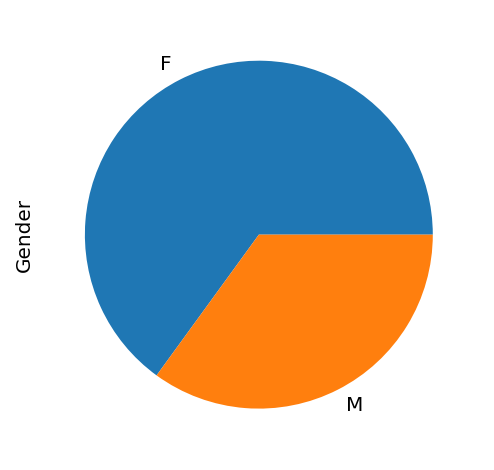

In [16]:
df['Gender'].value_counts().plot(kind='pie');

##### Based on the above diagram we can see:
- almost twice as much Female than Male patients

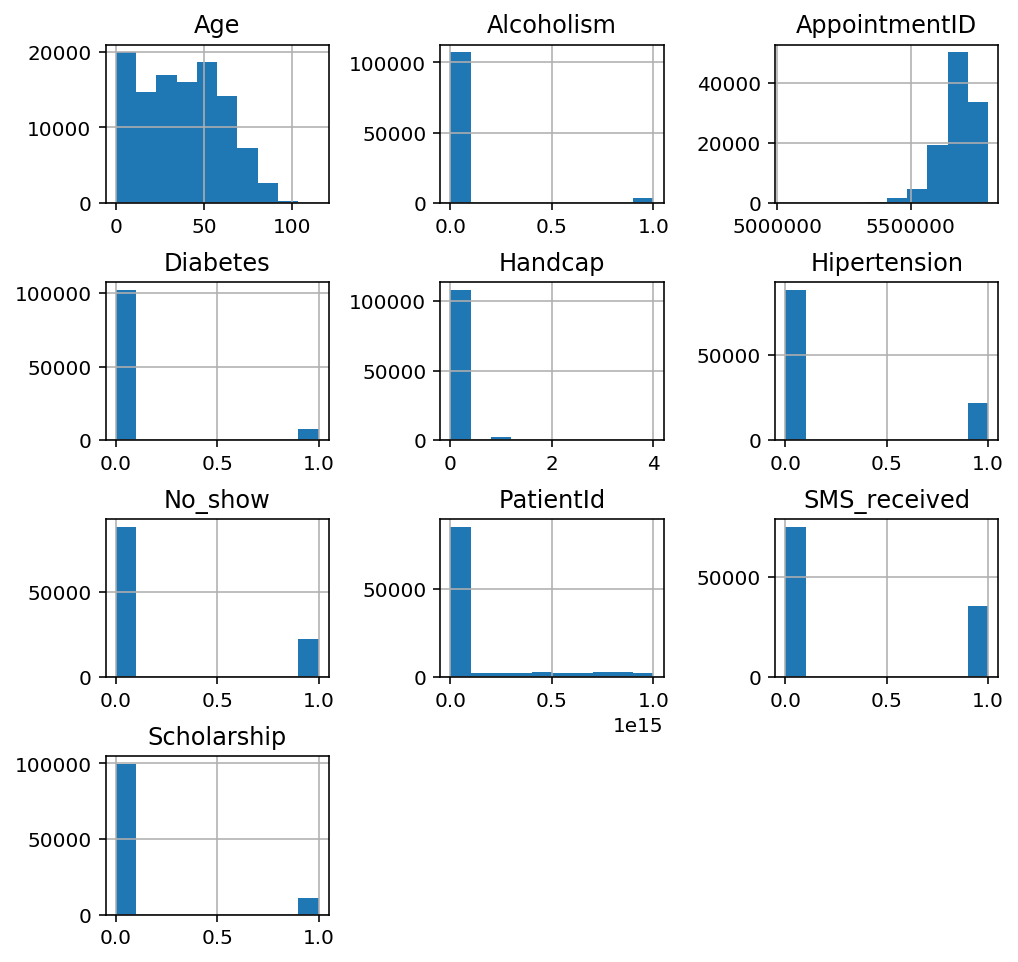

In [17]:
# show the distribution of values in each characteristic
df.hist(figsize=(8,8));
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.5)

##### Based on the histograms we can see:
- we have a good distribution in age in the dataset
- the values of the characteristics 'Alcoholism', 'Diabetes', 'Hipertension', 'No_show', 'SMS_received' and 'Scholarship' are binary
- the majority of the patients have no diabetes, no handcap, no hipertension, no scholarship and have no alcoholism
- about 1/5 of the patients do not show up to the appointment
- The age distribution is relativley uniformly distributed between 0 and 65 years and less patients older than 65.

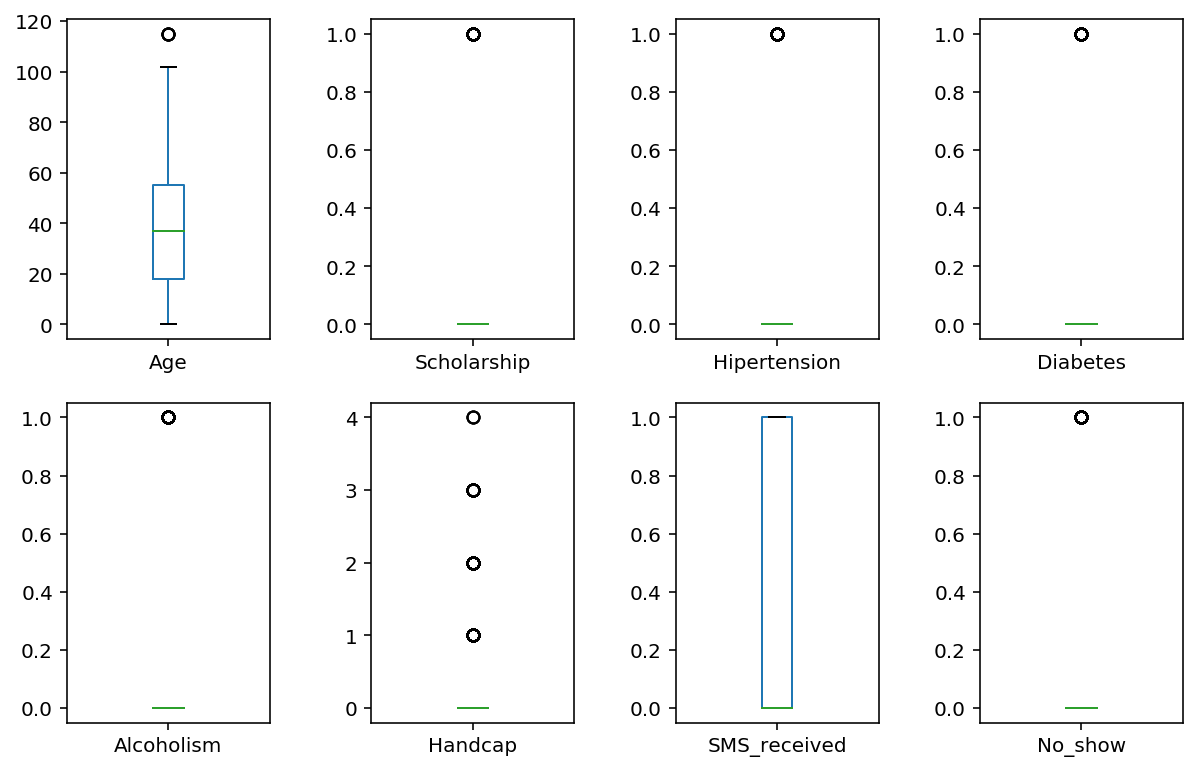

In [18]:
# copy only relevant columns of dataframe to a new dataframe df_reduced
df_reduced = df.drop(['AppointmentID', 'ScheduledDay', 'AppointmentDay', 'PatientId'], axis=1, inplace=False)
df_reduced.plot(kind='box', subplots=True, layout=(3,4), figsize=(10,10), sharex=False, sharey=False);

plt.subplots_adjust(wspace = 0.5)

##### Based on the diagrams above we can see:
- the distribution of the values in some columns
- Scholarship, Hipertension, Diabetes, Alcoholism and No_show only contain 2 values (binary)
- Age is distibuted between 0 and above 100
- handcap has 5 different values (discrete)

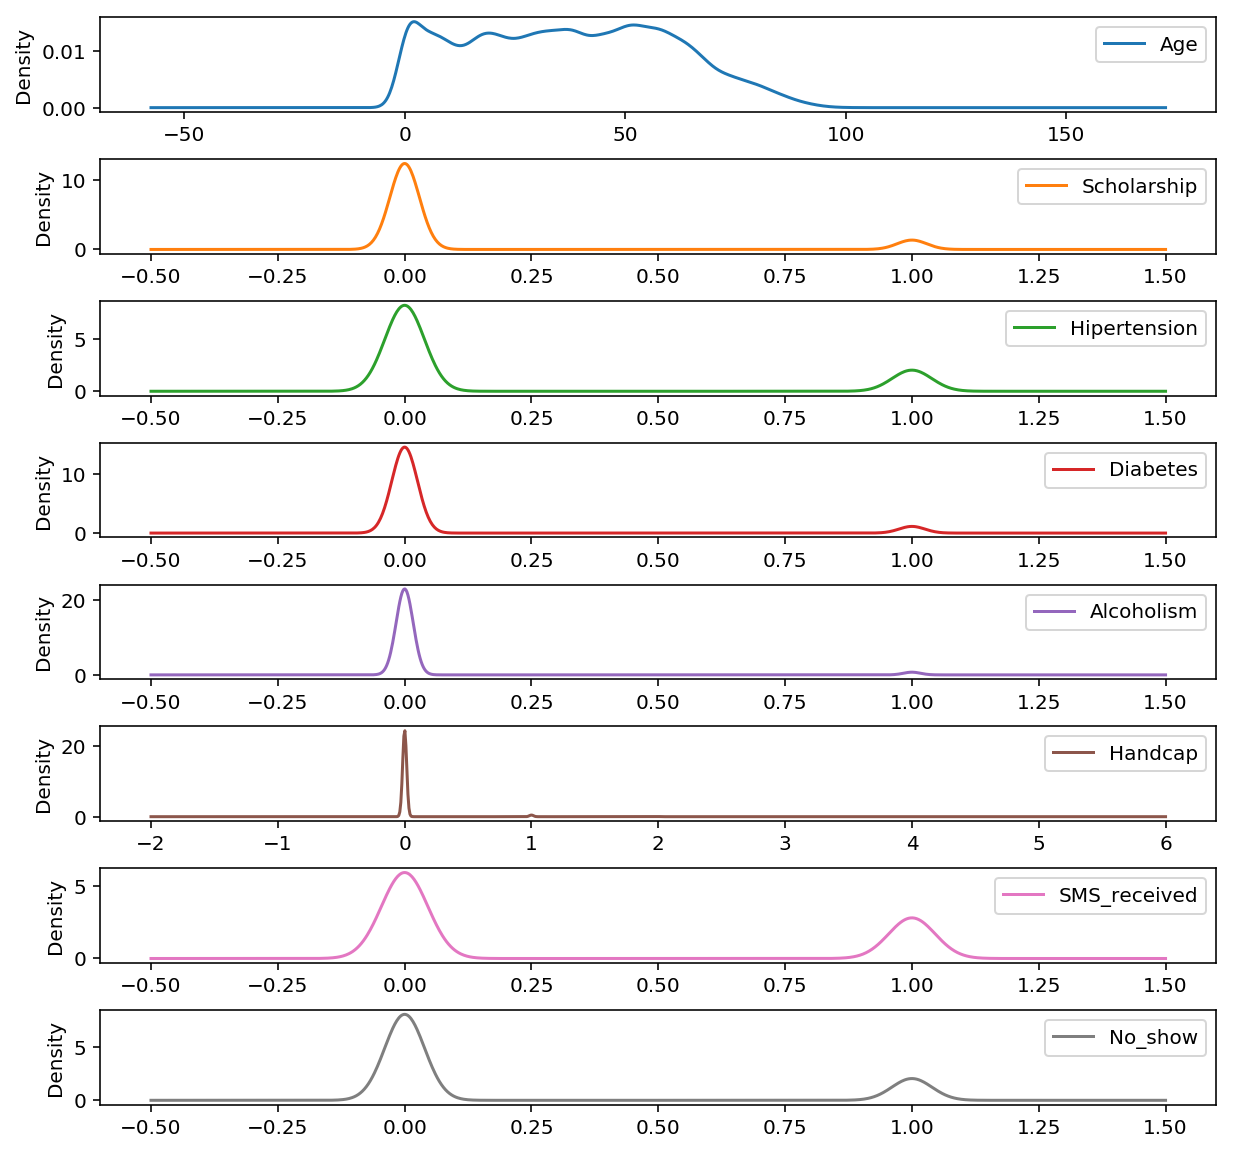

In [19]:
df_reduced.plot(kind='density', subplots=True, sharex=False, figsize=(10,10));
plt.subplots_adjust(hspace = 0.5)

##### Based on the above diagrams we can see:
- the density distribution of the values as continuous function
- the density function includes the amount of values at each x-value
- it shows the most likely value locations with a peak at its ticks
- /!\ Attention: this density function assumes that the column values are continuous and not binary nor discrete

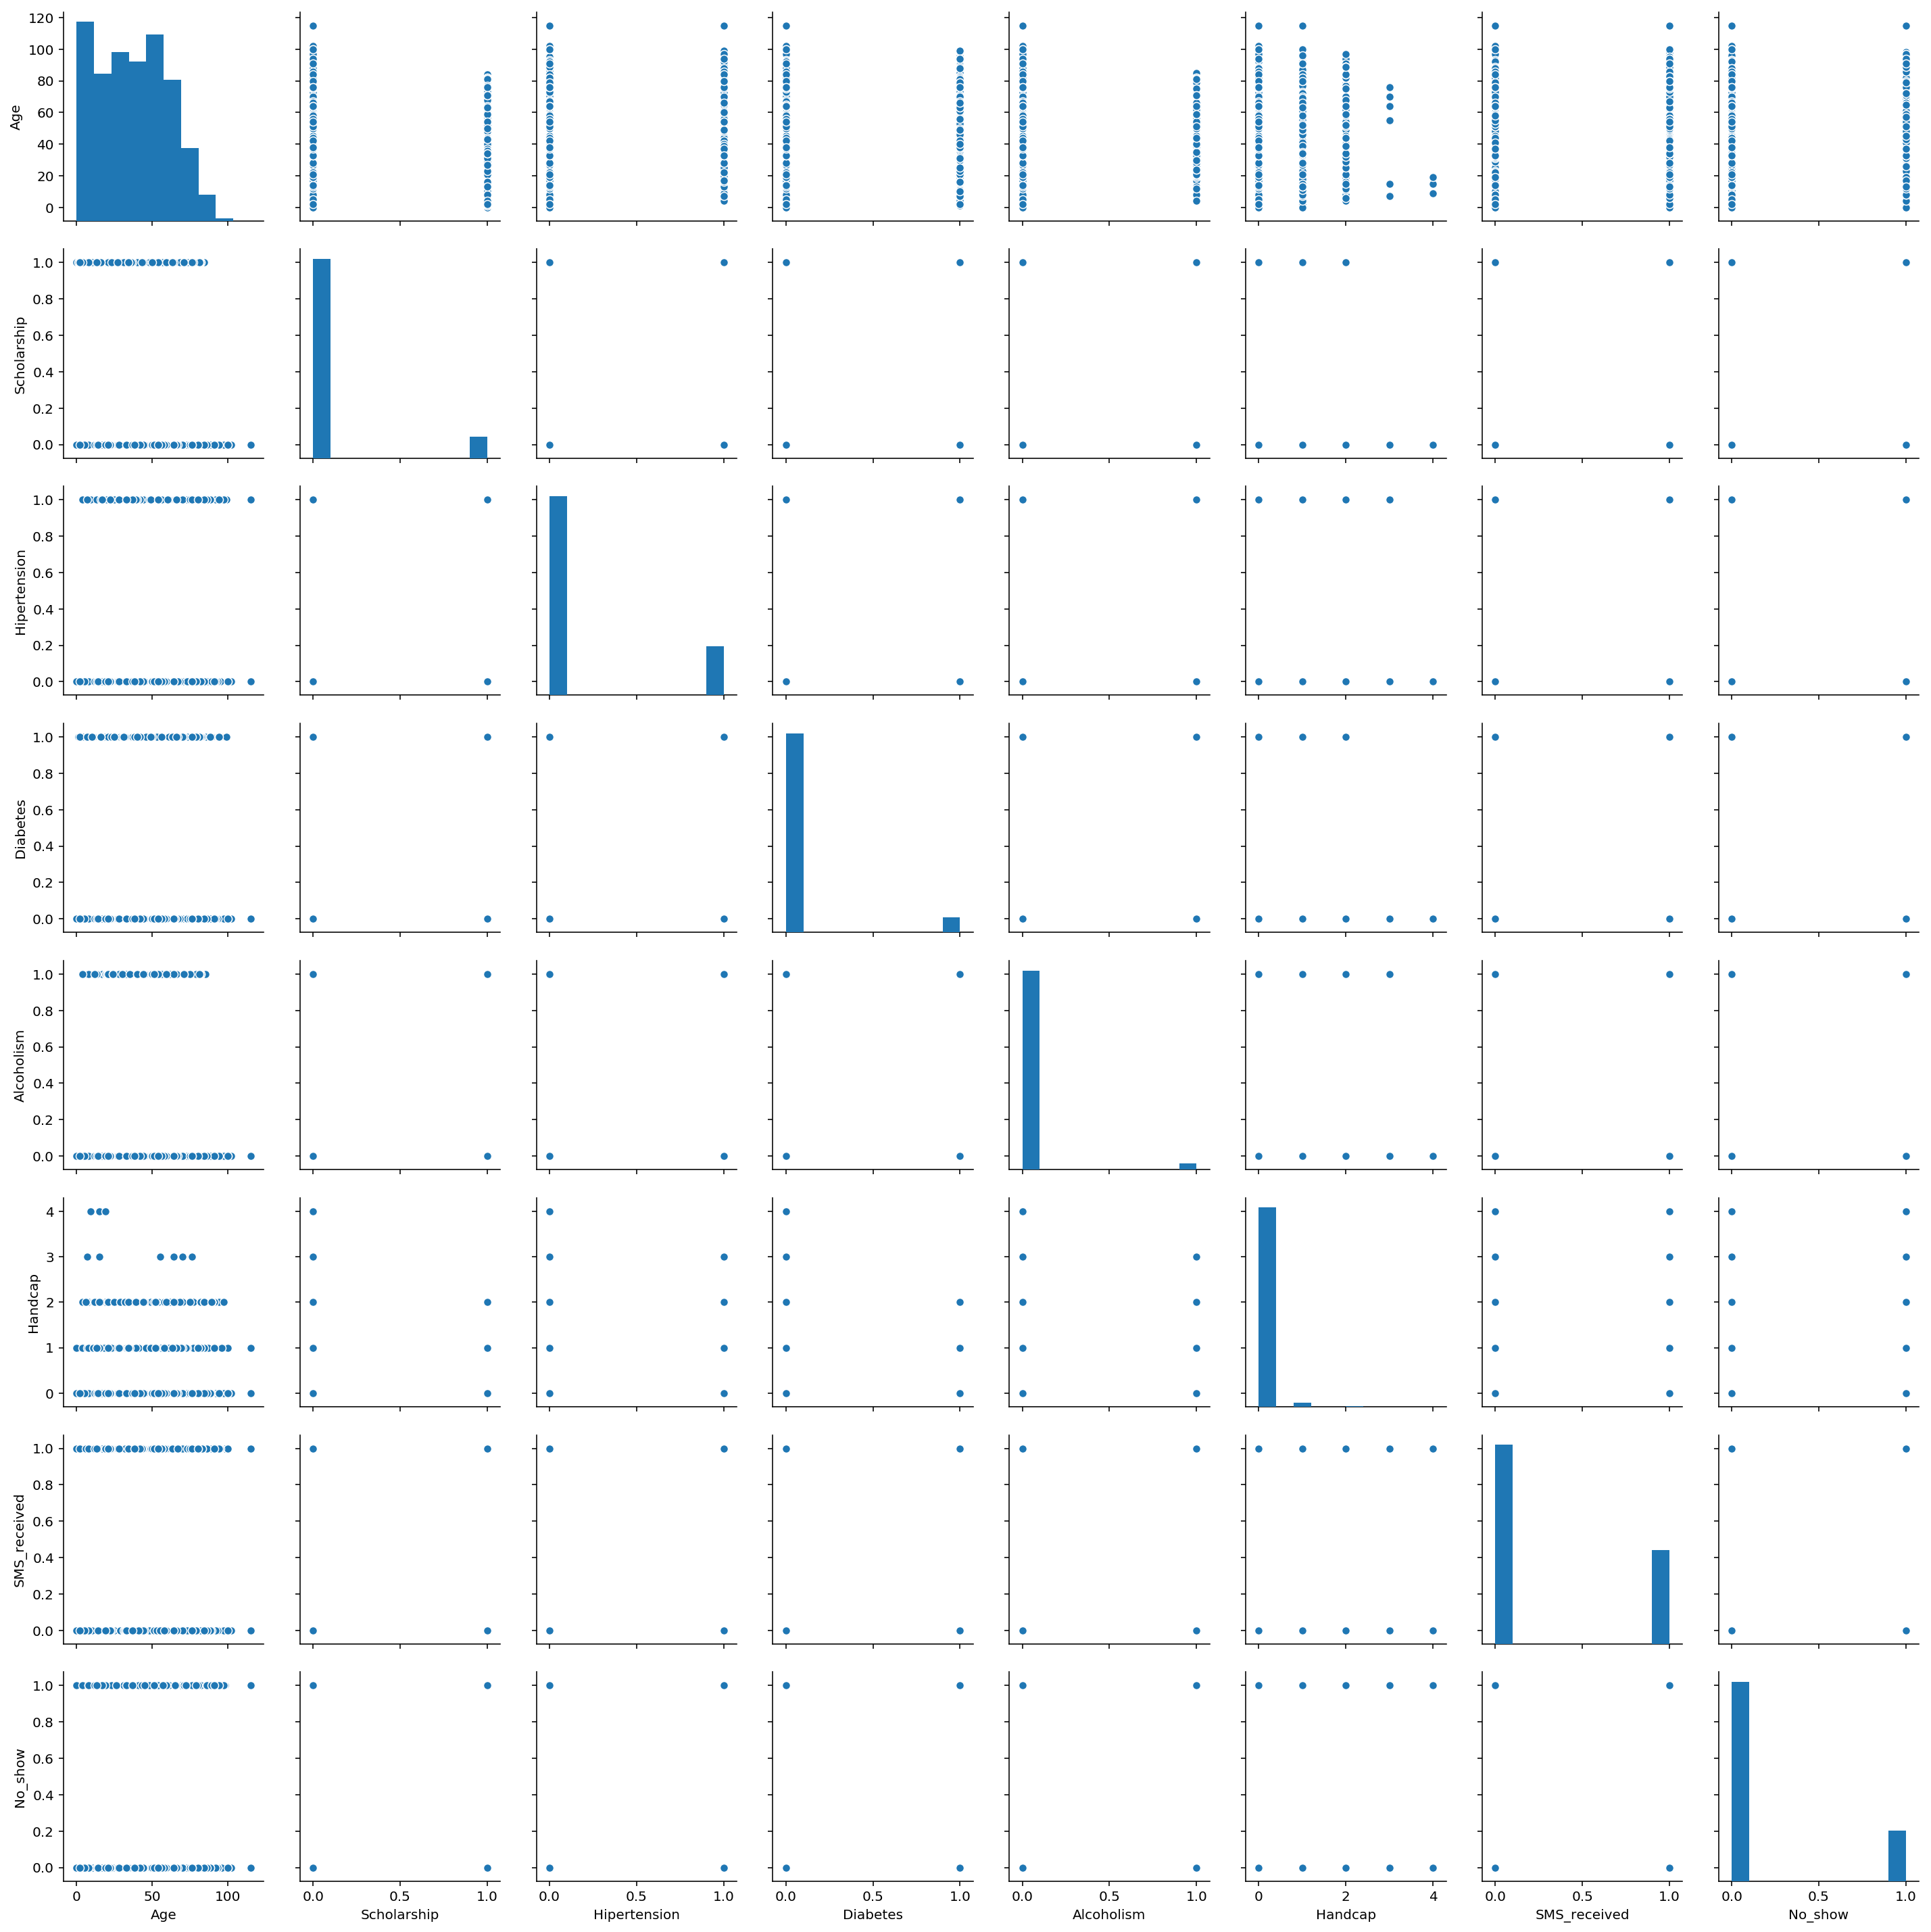

In [20]:
#pd.plotting.scatter_matrix(df2, alpha=0.2, figsize=(10,10));   # same with pandas
sns.pairplot(df_reduced.loc[:,df_reduced.dtypes == 'int64']);

##### Based on the above scatter matrix we can see:
- if the combination of two column values exist or not
- since most columns have binary or discrete (e.g. only 5 values) we can only see 4 to 10 dots
- this matrix doesn't show much about correlation between two columns, since almost all possilbe combinations are covered in the dataset and this matrix does not show how often the combinations (dots) are in the dataset

This is why we use the correlation matrix itself to visualize the correlation between columns:

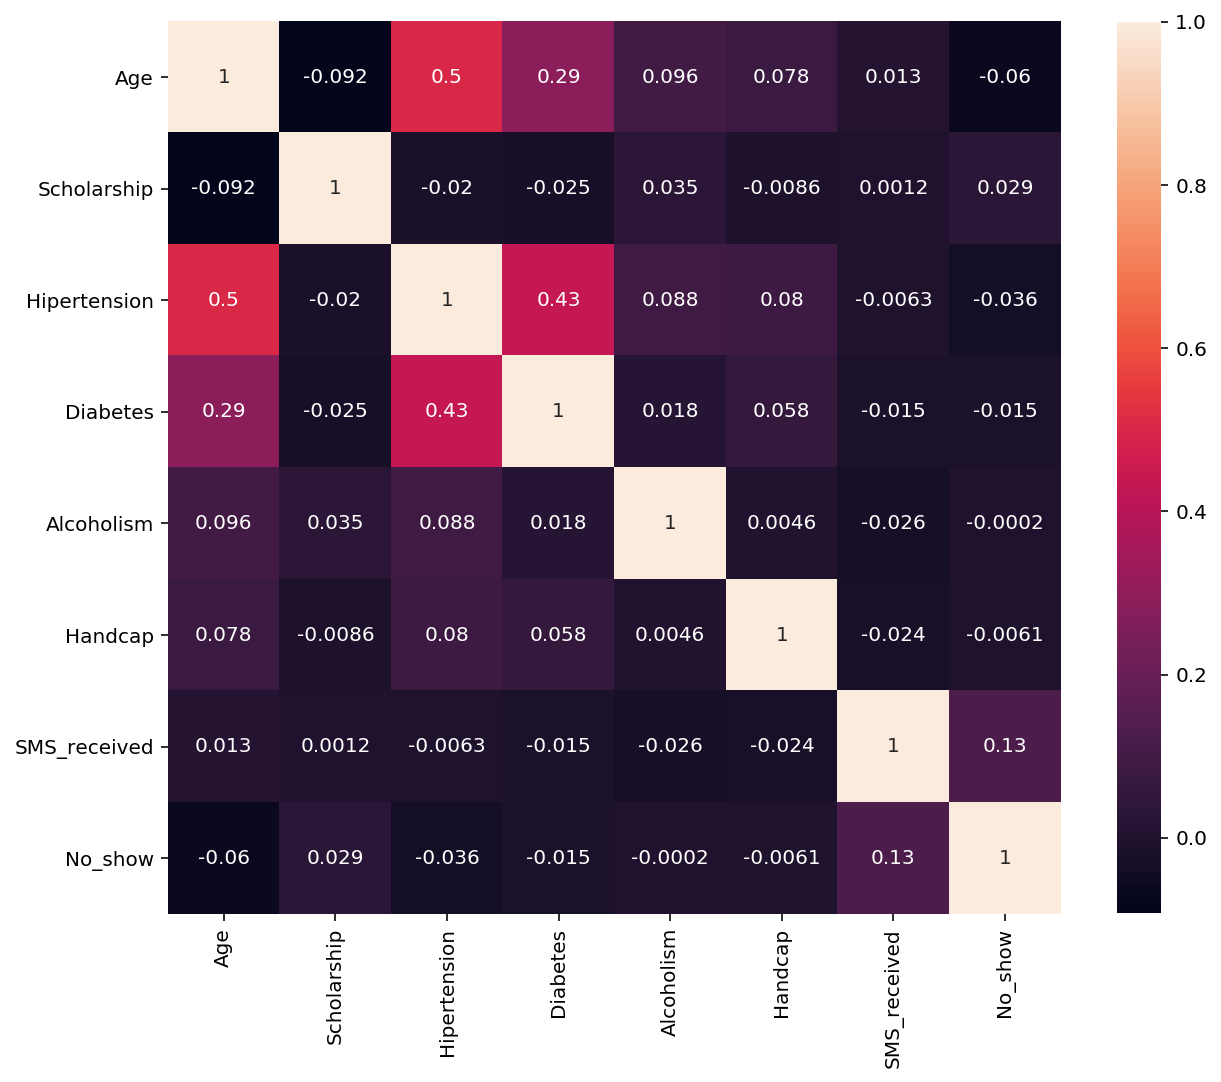

In [21]:
correlation = df_reduced.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, annot=True, square=True, cbar_kws={"shrink": 0.82});

##### Based on the above correlation matrix we can see:
- the correlation values between columns
- the '1' in the diagonal just tell the autocorrelation of each column with itself
- if we look at the 'No_show' columns we can see how much it correlates with other columns
- 'No_show' correlates the most with 'Scholarship' and the second most with 'SMS_received'. But both correlation values are pretty low
- The best correlation over all columns is between the 'Hippertension' and the 'Age'

In [22]:
# function to visualize the show-up 
def showingup_groupedby(column_name, show_mean=True, size=(5,4)):
    if show_mean:
        print(df.groupby(column_name)['No_show'].mean())
    df.groupby(column_name)['No_show'].mean().plot(kind='bar', title=('Average No-Show probability by '+ column_name), figsize=size);
    plt.ylabel('no-show mean')

### 1. If the patient is part of the scholarship program is it more or less likely that the patient will show up?

Scholarship
0    0.198072
1    0.237363
Name: No_show, dtype: float64


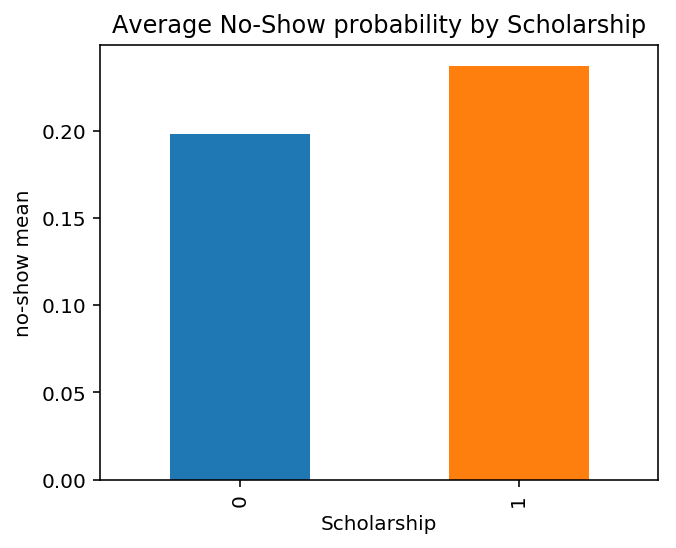

In [23]:
showingup_groupedby('Scholarship');

##### Based on the above diagram we can see:
- that in the goup of patients with scholarship there are more patients that don't show up (No_show: 24%)
- and in the group of patients without scholarship the patients show up more often (No_show: 20%)

#### Answer:
- Patients with a scholarship show up to an appointment less often.

### 2. Have some of the medical informations about the patient (Alcoholism, Hipertension, Diabetes, Handcap) an influence to the patients reliability?

Alcoholism
0    0.201946
1    0.201488
Name: No_show, dtype: float64


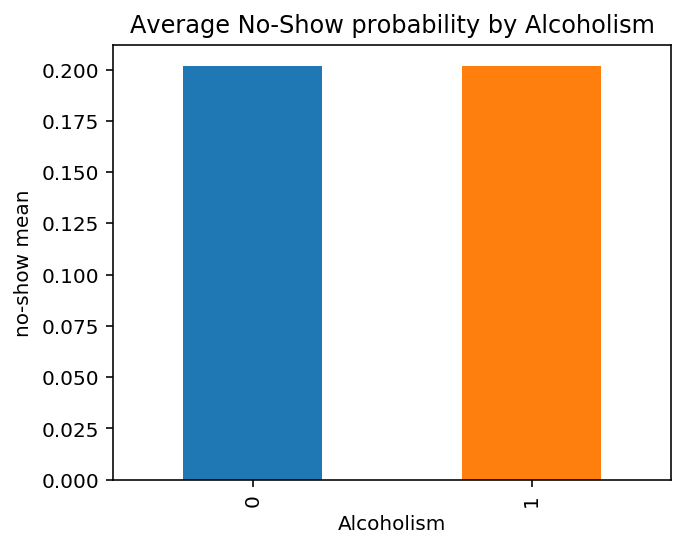

In [24]:
showingup_groupedby('Alcoholism');

In [25]:
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

##### Based on the above diagram we can see:
- that patients with or without alcoholism have almost the same 'No_show' rate (likelihood)

##### Based on the above numbers we can see:
- that 3360 patients with alcoholism are in the dataset, which should be enough for this statistic

Hipertension
0    0.209037
1    0.173020
Name: No_show, dtype: float64


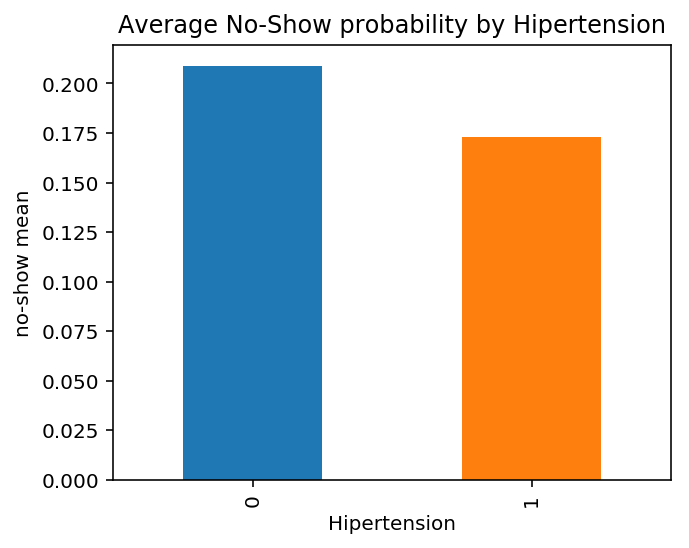

In [26]:
showingup_groupedby('Hipertension');

In [27]:
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

##### Based on the above diagram we can see:
- that patients with Hipertension have shown up more often ('No_show': 17%)
- that patients without Hipertension have shown up less often ('No_show': 20%)

##### Based on the above numbers we can see:
- that 21081 patients with Hipertension have are in the database. Which should be enough for now.

Diabetes
0    0.203628
1    0.180033
Name: No_show, dtype: float64


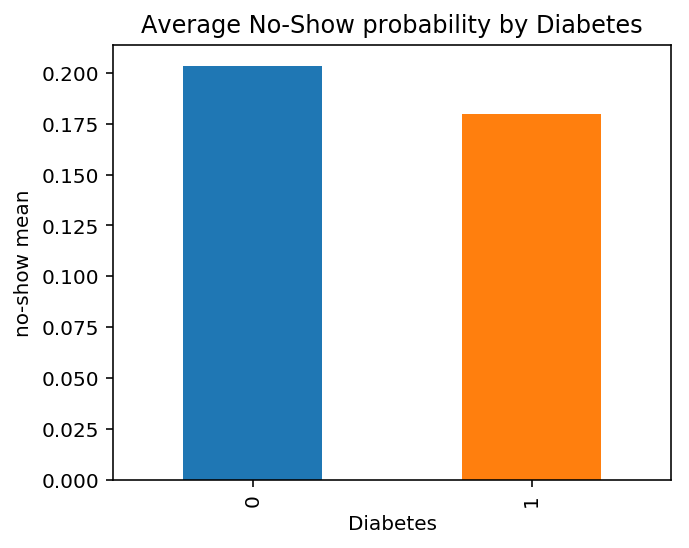

In [28]:
showingup_groupedby('Diabetes');

In [29]:
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

##### Based on the above diagram we can see:
- that patients with Diabetes have shown up little bit more often ('No_show': 18%)
- that patients without Diabetes have shown up less often ('No_show': 20%)

##### Based on the above numbers we can see:
- that 7943 patients with Diabetes have are in the database. Which should be enough for now.

Handcap
0    0.202353
1    0.179236
2    0.202186
3    0.230769
4    0.333333
Name: No_show, dtype: float64


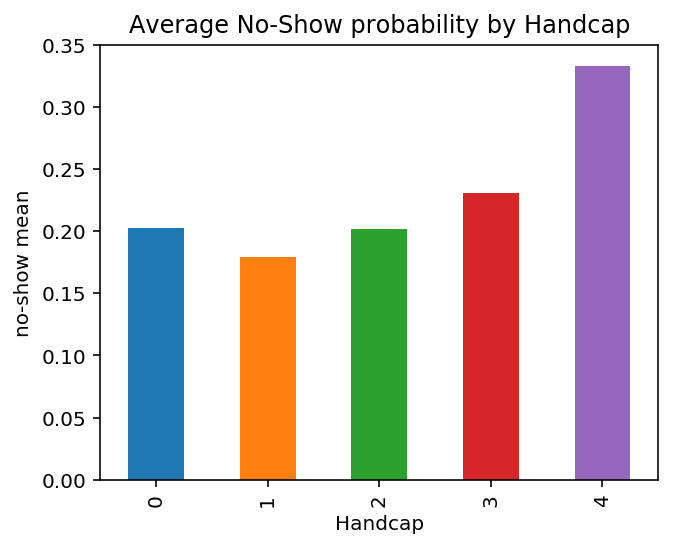

In [30]:
showingup_groupedby('Handcap');

In [31]:
df.groupby('Handcap')['No_show'].value_counts()

Handcap  No_show
0        0          86374
         1          21912
1        0           1676
         1            366
2        0            146
         1             37
3        0             10
         1              3
4        0              2
         1              1
Name: No_show, dtype: int64

##### Based on the above diagram we can see:
- that patients with handicap of category 3 and 4 have shown up less often (category 3 - 'No_show': 23%, category 4 - 'No_show': 33%)

##### Based on the above numbers we can see:
- But with a closer look to the amount of patients with the **handicap of category 4**, it comes out: there are only 3 patients of this category. So the above mean statistic is not informative at all.
- **Handicap** has no informative influence to the reliability of the patient. The variances in the categories mean values due to not enough samples in each category.

#### Answer:
- **Alcohol** and has no informative influence to the reliability of the patient.
- Patients with **Hipertension** are a little bit more reliable to show up to an appointment.
- Patients with **Diabetes** are a little bit more reliable to show up to an appointment.
- **Handicap** has no informative influence to the reliability of the patient. The variances in the categories mean values due to not enough samples in each category.


### 3. Are the reliability in each neighbourhood the same or are their more reliable neighbourhoods than others?

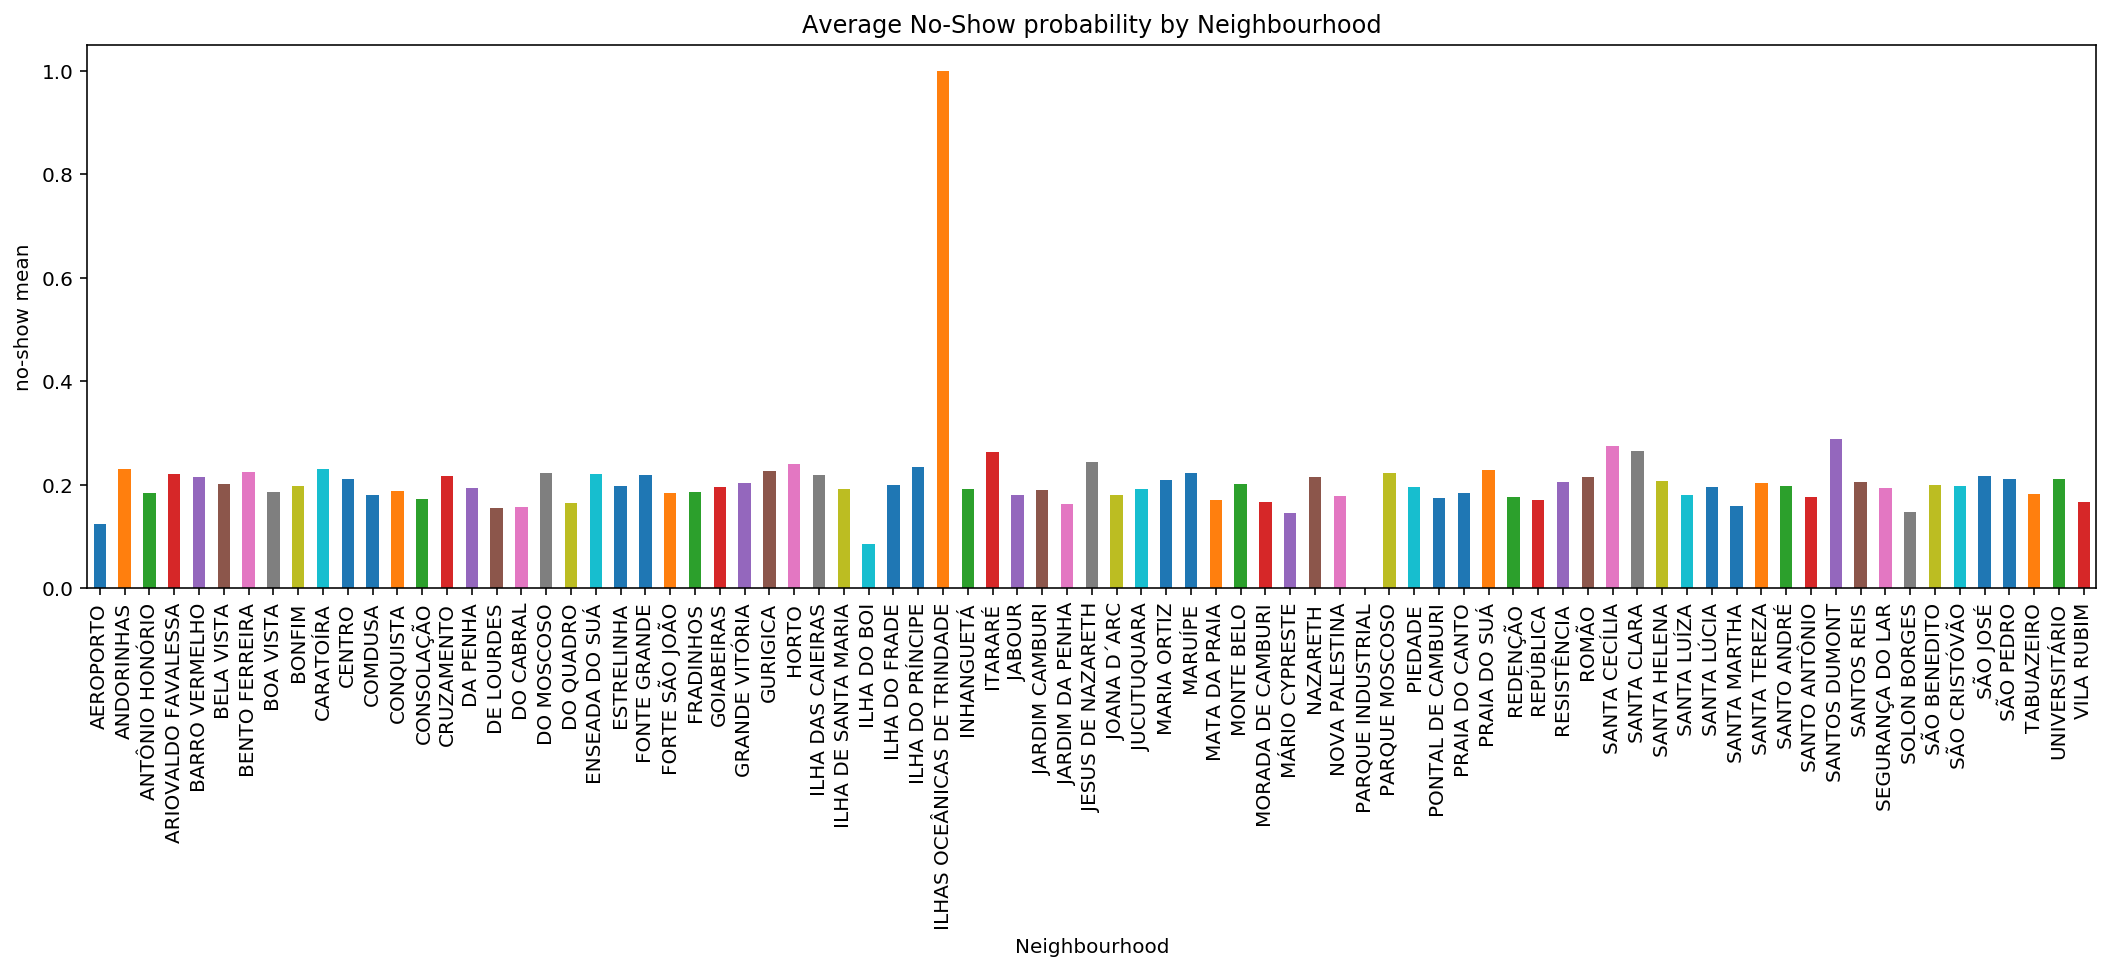

In [32]:
showingup_groupedby('Neighbourhood', False, size=(18,5));

##### Based on the above diagram we can see:
- the No_show average per region
- in all regions the patients are more or less the same reliable and miss appointments about 20% unless in one region (orange peak).
- The only region with 100% no-show rate has only 2 patients. So this statistics not informative, since there are too less samples.

In [33]:
reliability_series = df.groupby('Neighbourhood')['No_show'].mean() == 1
reliable_region = ""

for name, val in reliability_series.iteritems():
    if val == True:
        reliable_region = name
        print("All patients of the region ", name, " did not show up to the appointment.")

All patients of the region  ILHAS OCEÂNICAS DE TRINDADE  did not show up to the appointment.


In [34]:
amount_patients_in_reliable_region = df[df['Neighbourhood'] == reliable_region].shape[0]

print('But there are only ', amount_patients_in_reliable_region, ' patients in the region: ', reliable_region, ".")

But there are only  2  patients in the region:  ILHAS OCEÂNICAS DE TRINDADE .


#### Answer:
- In all regions the patients are more or less the same reliable and miss appointments about 20%.
- The only region with 100% no-show rate has only 2 patients. So this statistics not informative, since there are too less samples.

### 4. Does it help if the patient receive an SMS before the appointment? Do those patients that receive an SMS appear more often to their appointments?

SMS_received
0    0.167033
1    0.275745
Name: No_show, dtype: float64


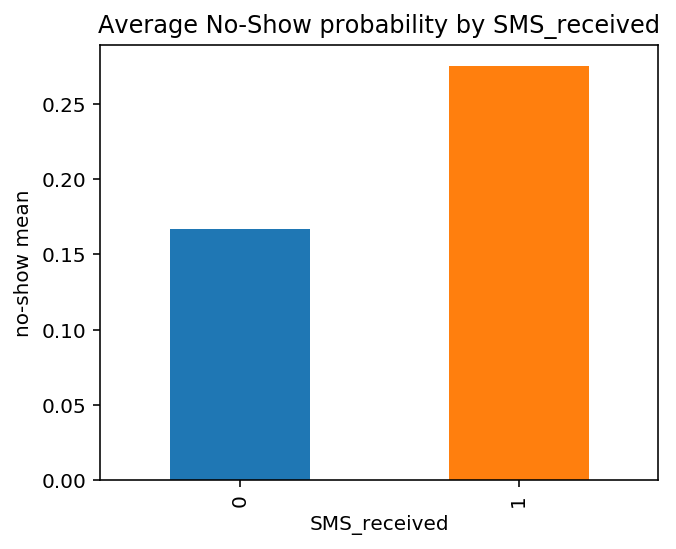

In [35]:
showingup_groupedby('SMS_received');

In [36]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

##### Based on the above diagram we can see:
- that in the goup of patients with an received SMS there are more patients that don't show up (No_show: 28%)
- and in the group of patients without an received SMS the patients show up more often (No_show: 17%)

#### Answer:
- Patients that got a SMS as a reminder show up to an appointment less.

### 5. Are there a different behaviour between man and woman?

Gender
F    0.203146
M    0.199679
Name: No_show, dtype: float64


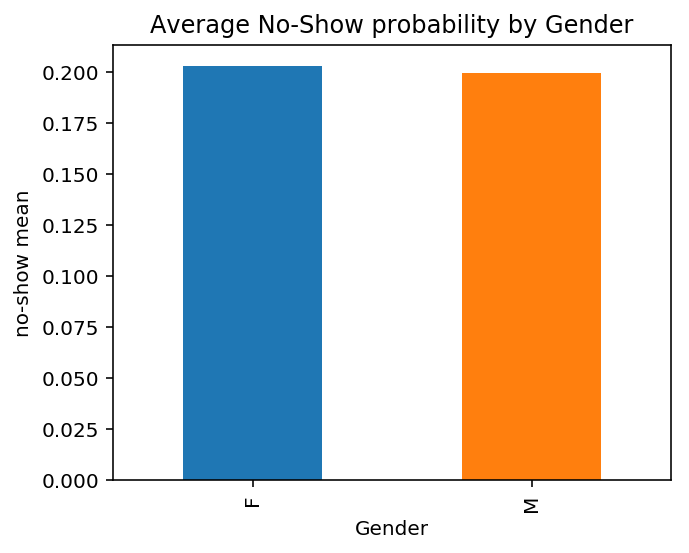

In [37]:
showingup_groupedby('Gender');

##### Based on the above diagram...

#### Answer:
- The gender is not important to predict the show up.

### 6. Is age a relevant characteristic to predict if a patient will show up or not?

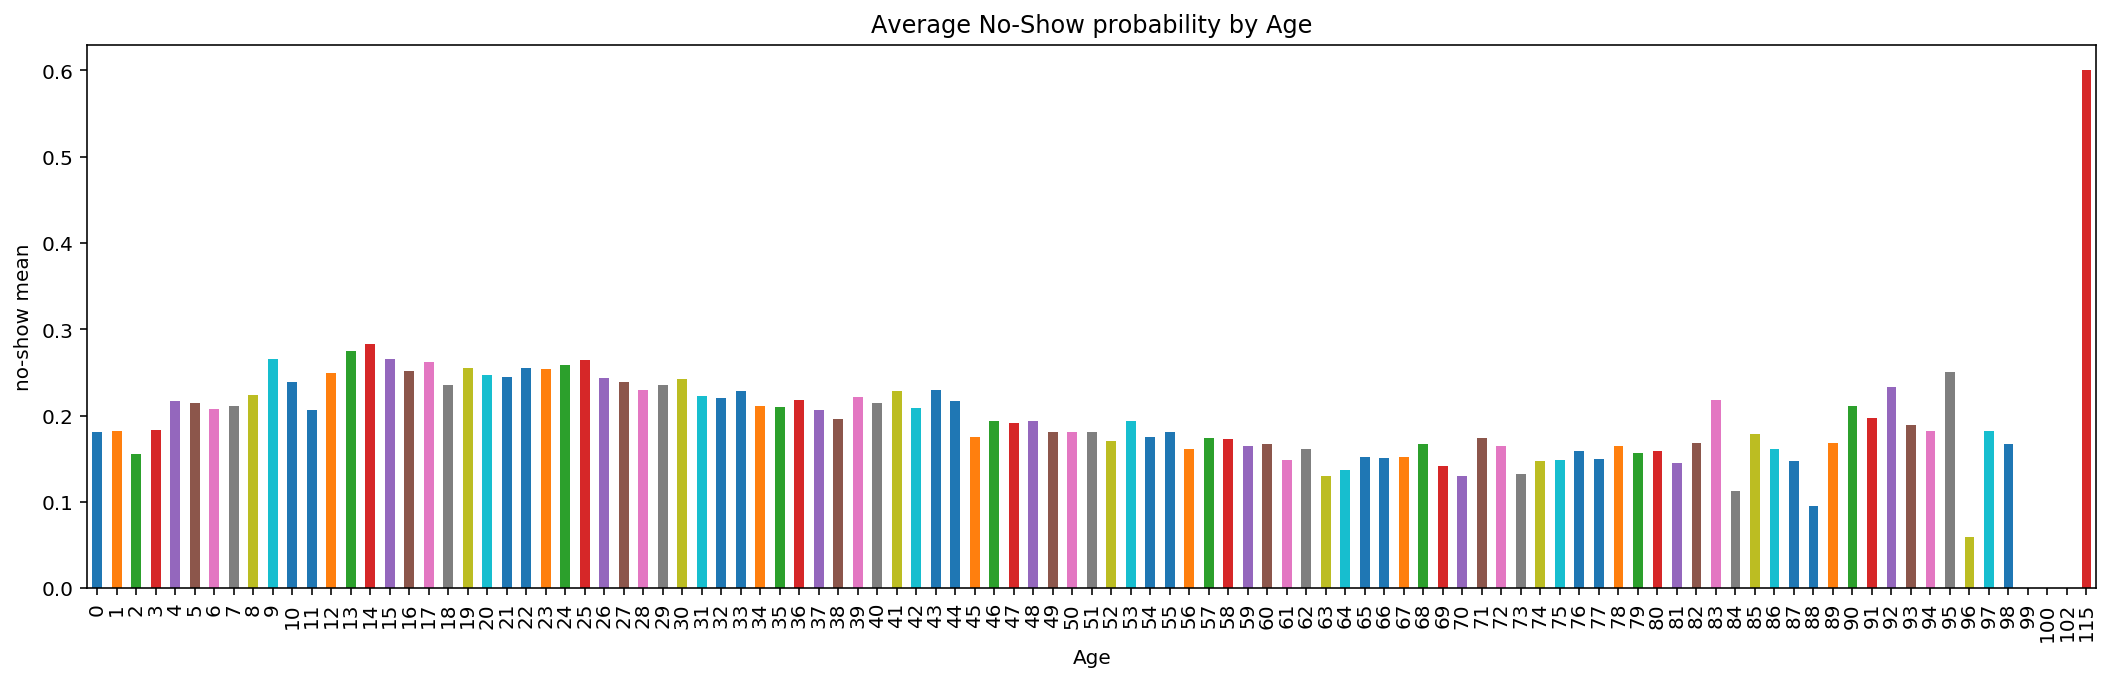

In [38]:
showingup_groupedby('Age', False, size=(18,5));

##### Based on the above diagram...

#### Answer:
- The younger patients (youths) show up less often to their appointment than the elderly.
- The oldest people show up even less or much more. But this is due too less samples in the statistic and are not informative.

<a id='conclusions'></a>
## 4. Conclusions

**Correlations:**
- Patients *with Hipertension or Diabetes* are a little bit more reliable to show up to an appointment.
- Patients with a *Scholarship* show up less often to an appointment.
- *Younger people* (about <40) in general are less often showing up to an appointment than *older people* (about >60).

**No correlations at all:**
- *Alcohol, Gender and Region* has no influence to the show up of an patient.

**Correlation but no statement possible:**
- For *Handcap* are not enough samples for each category to make informative statements or statistics.
- Sending an *SMS* will not help to force the patient to come. Maybe this statistic came out due to the fact, that younger people have a mobile phone more often than older people. So the actual cause is not observed here.

------
### Limitation of dataset:
- too less samples of patients with handicap of category 2, 3 and 4
- many regions have too less samples to differentiate
- the appointment samples are all from the time interval inbetween 41 days, not enough (inbetween 1 year would be great)


**Other missing interesting data:**
- the time of the appointment would be interesting
- the education of each patient would be interesting
- more information acording the regions would be interesting (e.g. average rent for flats)
- it would be interesting if the patient called to cancel the appointment (not covered in this dataset)
- it would also be interesting if it is the patients first appointment at this doctor



------
## Further exploration ideas:
- if it is more likely that patient will miss an appointment if he/she already missed an appointment earlier (merge with PatientID)
- if there are dublicates (look up with AppointmentID)
- Is there a different No_show rate when the scheduled day also is the appointment day?


In [39]:
# used packages and versions
# source to print used packages and versions: https://stackoverflow.com/questions/40428931/package-for-listing-version-of-packages-used-in-a-jupyter-notebook
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to had
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

seaborn==0.9.0
pandas==0.23.4
numpy==1.15.4
matplotlib==3.0.2
